# Term Paper


### Project Statement

What causes Ghana's high exchange rate depreciation? While exchange rate volatility in this case depreciation, has been associated to macroeconomic instability anecdotally, very little effort has been done to investigate the factors that cause it. Furthermore, arguments about the changes in Ghana's currency rate are based mainly on public economic discourses, with little empirical or theoretical content.

This study looks at the relationship between exchange rate and agricultural exports, notably cocoa exports, in order to better understand the key determinants of exchange rate volatility and the channels through which they manifest. The Ghanaian economy has been burdened by repeated depreciation of the Cedi since currency deregulation in 1986, requiring currency redenomination in 2007.

The Ghana Cedi (GH), which first traded at 0.94 to the US Dollar (USD) after the redenomination in 2007, has subsequently lost a significant amount of value, and now trades at about GH6 to the USD. While the theoretical relationship between exports and imports and currency volatility has been established, empirical evidence has shown that the relationship is country-specific and slanted in favor of currency variation shocks to trade.

This study will employ Directed Acyclic Graphs (DAGs) to determine the causation between the exchange rate and Ghana's cocoa exports between year 2000 to 2020. 

##### Sources of data
https://www.intracen.org/itc/market-info-tools/trade-statistics/

https://databank.worldbank.org/source/world-development-indicators

http://www.fao.org/faostat/en/#data/TCL

### Project Proposal
(1000 words; at least 2 data sources; at least 2 different types of data visualizations )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = pd.read_excel("Data.xlsx")
data_df = pd.DataFrame(data)
data_df

,Year,HDI,Export Value (2010 U$D),GDP (2010 U$D),$ Exchange Rate,Cocoa Exports (2010 U$D)
0,1990,0.465,9.939685e+08,1.205614e+10,0.032616,393781000
1,1991,0.470,1.119008e+09,1.269293e+10,0.036763,350140000
2,1992,0.474,1.104856e+09,1.318534e+10,0.043685,298630000
3,1993,0.478,1.208401e+09,1.382483e+10,0.064871,280390000
4,1994,0.480,1.375222e+09,1.428105e+10,0.095568,321040000
5,1995,0.483,1.583729e+09,1.486834e+10,0.119914,355660000
6,1996,0.484,2.226975e+09,1.555265e+10,0.163547,711263000
7,1997,0.486,2.233493e+09,1.620530e+10,0.204796,457069000
8,1998,0.487,2.533905e+09,1.696701e+10,0.231166,516988000
9,1999,0.489,2.476241e+09,1.771356e+10,0.266643,460565000


#### Research problem

In Ghana, the Financial Sector Adjustment Programme (FINSAP), which was part of the Economic Recovery Program (ERP), initiated extensive financial sector changes in the 1980s, including the abandonment of fixed exchange rates in favor of a free-floating regime[1]. This transition was made, among other things, on the assumption that flexible exchange rates would reduce the boom-and-bust cycle and steer the country toward a growth path, with the growth-enhancing effect of exchange rate pass-through on consumer prices, terms of trade, trade volumes, and investments.

The Ghana Cedi has fallen against major currencies, particularly the US Dollar (US$), since its adoption of the flexible exchange rate regime in the 1980s, though not in an uniform manner, since the Ghana Cedi saw some stability between 2002 and 2007[1]. On July 1, 2007, Ghana's currency was redenominated, and one dollar was exchanged for 93 pesewas. The Cedi depreciated as a result of this action, and at the end of July 2009, the US dollar was worth GH1.49. The Cedi has been extremely volatile recently, depreciating by reaching 6.0 Ghana Cedis in 2021. This has been a major issue of concern since it has been argued that it contributes to the rise of consumer price inflation. From the figure presented, it can be observed that the period after 2007 has seen a very steep climb as compared to the period prior.

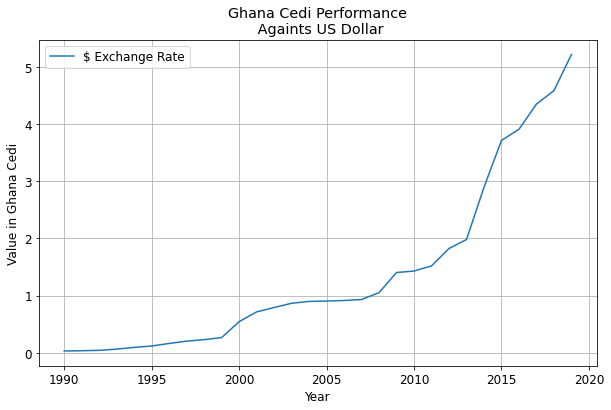

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":12})
fig, ax = plt.subplots(figsize = (10, 6))
data_df.plot.line(x="Year", y = "$ Exchange Rate", ax = ax, legend = True)
plt.title("Ghana Cedi Performance\n Againts US Dollar")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Value in Ghana Cedi")
plt.show()

Arguements on the relationship between exchange rate and exports has ben centered on the effect of the depreciation of a currency on the exports, in this case there is an incentive to export because the exporter receives more of its local currency for the same exports[2,3,4]. Also, a stronger currency is said to make exports from that nation expensive hence a reduction in the exports as argued by the sminal work on the Exchange Rate and U. S. Agriculture by Schuh [2].In Ghana, some studies that revealed a significantly positive relation between current cocoa export price and production, increase in cocoa export prices due to exchange rates stimulate farmers to increase production in the country[5].

Cocoa is the pillar of Ghana's formal economy, accounting for a large portion of the country's total export profits and income[6]. Cocoa was first exported at the end of the nineteenth century, and Ghana was the world's biggest exporter from 1911 and 1976, accounting for 30-40% of global output. Ghana, after Ivory Coast, is the world's second largest producer of cocoa beans, accounting for around 20% of global output. About 80% of the country's cocoa is exported unprocessed, with the remaining 20% being processed (cocoa butter, cocoa paste, and cocoa shells). Ghana's cocoa is mostly exported (raw and processed) to the United States, the European Union, and Asia. Ghanaian cocoa is farmed by small-holder farmers, as it is in most cocoa-producing countries. Cocoa's export revenues have continuously decreased from 67 percent in 1986 to roughly 19.1 percent in 2020, with a value of $2.3 billion. 

<ipython-input-4-3021ebc3d633>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


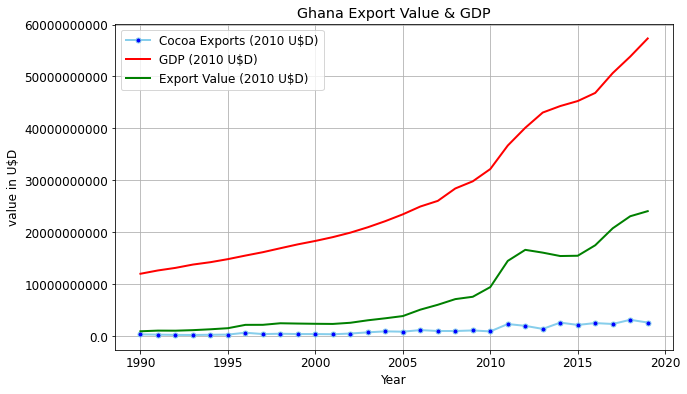

In [4]:
plt.rcParams.update({"font.size":12})
fig, ax = plt.subplots(figsize = (10, 6))
plt.title("Ghana Export Value & GDP")
plt.plot("Year", "Cocoa Exports (2010 U$D)", data=data_df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot("Year", "GDP (2010 U$D)", data=data_df, marker='', color='red', linewidth=2)
plt.plot("Year", "Export Value (2010 U$D)" , data=data_df, marker='', color='green', linewidth=2)
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])
plt.legend()
plt.xlabel("Year")
plt.ylabel("Value in U$D")
plt.grid()
plt.show()

First it will be import to establish whether exchange rate causes agricultural exports or vice versa in Ghana. This will lay a solid foundation to determine the actual relationship between the exchange rate and agricultural exports. 

#### Research Objective
This study is going to determine the nature of relationship between exchange rate and agricultural exports specifically cocoa from Ghana between 2000 to 2020. 

#### Literature Review

In the economic literature, there are two ideas about what causes currency crises. Currency instability is linked to structural imbalances and inadequate policies in the first, whereas arbitrary fluctuations in market expectations are the primary driver of instability in the second[11]. One approach to exchange rate instability, known as first-generation or exogenous-policy models, sees a currency crisis as an inescapable consequence of unsustainable policy postures or structural imbalances. This perspective emphasizes that the exchange rate regime is part of a larger policy package, and that it can only be maintained if it does not contradict with other monetary and fiscal goals. According to the first-generation approach, a country's ability to finance its current account deficits by generating sufficient export earnings in the future is also a crucial element impacting the viability of an exchange rate regime[12]. This provides a basis to explore the empirical relationship between export earnings and exchange rate. 

Literature on the relationship of trade and exchange rate has been skewed towards the effect of exchange rate on exports as an incetive to export[2,3,4], very little has been done with regards to empirical research into the effect of exports on foreign exchange. An Indian study which attempted to investigate the causal relationships between quantity of agricultural export and real exchange rate using yearly time series data between 1980 and 2010 found no significant relationship between exchange rates and agricultural export. Granger-causality analysis was employed to determine this relationship[7]. The use of yearly data will however fail to pick out details regarding movements within the year which can provide useful information for causal relatioships.

According to a Ghanaian study on the drivers of currency rate volatility, around three-quarters of real exchange rate shocks are self-driven, with the remaining one-quarter or so attributable to factors like government spending and money supply increases, terms of trade, and output shocks[13]. Another study, which used backward elimination and stepwise regression to determine the key variables that influence the frequent exchange rate depreciation in Ghana from 1980 to 2015, found that agricultural output, industrial output, services output, and exports all had a significant impact on the Ghana Cedi's exchange rate against the dollar[14].

Studies into ddeterminants of exchange rates who attempt to include exports in their models employ the use of trade openness[8,9] Trade openess is a handy variable regularly employed in a range of international macroeconomic studies, defined as the ratio of exports + imports to GDP which has been used in cross-country studies on a wide range of issues, including real exchange rate dynamics[10]. However, this fails to capture the specific effect of exports. 

This study proposes to use quarterly data to establish the relationship between exports and exchange rate using cocoa exports data in Ghana.

#### Data

Quaterly data on cocoa exports from Ghana between 2000 to 2020 will be obtained from the International Trade Center's trade statistics. Quaterly cedi exchange rate with the dollar which is the major trading currency between 2000 to 2020 will also be obtained from data from the World Bank's development indictors. Other indicators such as GDP per capita will be obtained from the same source

#### Method

Granger Causality test to determine the direction of causality between exchange rate and agricultural exports
DAGs to confirm the results from the granger test.

#### References

1. Alagidede, Paul, and Muazu Ibrahim. "On the causes and effects of exchange rate volatility on economic growth: Evidence from Ghana." Journal of African Business 18, no. 2 (2017): 169-193.

2. Schuh, G. Edward. "The exchange rate and US agriculture." American Journal of Agricultural Economics 56, no. 1 (1974): 1-13.
3. Batten, Dallas S., and Michael T. Belongia. “Monetary Policy, Real Exchange Rates, and U.S. Agricultural Exports.” American Journal of Agricultural Economics 68, no. 2 (1986): 422–27. https://doi.org/10.2307/1241457.
4. Berman, Nicolas, Philippe Martin, and Thierry Mayer. "How do different exporters react to exchange rate changes?." The Quarterly Journal of Economics 127, no. 1 (2012): 437-492.
5. Boansi, David (2013). Competitiveness and Determinants of Cocoa Exports from Ghana. International Journal of Agricultural Policy and Research, 1(9): p. 236-254.
6. USDA. (2012). Global Agricultural Information Network (GAIN) Report. Accra.
ComtradeUnitedNations file:///C:/Users/user/Desktop/Active%20folder/Product%20Profile.html
7. Mousavi, Saeid, and D. S. Leelavathi. "Agricultural export and exchange rates in India: the granger causality approach." International Journal of Scientific and Research Publications 3, no. 2 (2013): 1-8.
8. Caporale, Guglielmo Maria, Thouraya Hadj Amor, and Christophe Rault. "Sources of real exchange rate volatility and international financial integration: A dynamic generalised method of moments panel approach." Journal of International Development 26, no. 6 (2014): 810-820.
9. Stanc¨k, J. (2007). Determinants of exchange rate volatility: The case of the new EU members, The Czech Journal of Economics and Finance, 57 (9-10): 414ñ432.
10. Goldfajn, I. and Valdéz, R. O. (1999). ‘ The aftermath of appreciations’, Quarterly Journal of Economics, Vol. 114, pp. 229– 262.
11. Pesenti, Paolo A., and Cédric Tille. "The economics of currency crises and contagion: An introduction." Economic Policy Review 6, no. 3 (2000).
12. Krugman, Paul. "A model of balance-of-payments crises." Journal of money, credit and banking 11, no. 3 (1979): 311-325.
13. Alagidede, Paul, and Muazu Ibrahim. "On the causes and effects of exchange rate volatility on economic growth: Evidence from Ghana." Journal of African Business 18, no. 2 (2017): 169-193.
14. Enu, Patrick. "The key drivers of the exchange rate depreciation in Ghana." Journal of Basic and Applied Research International 22, no. 4 (2017): 132-147.	